In [1]:

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


In [2]:

# Load predictions
lstm_pred = pd.read_csv('../models/lstm_pred.csv')  # unit, RUL_pred
xgb_pred = pd.read_csv('../models/xgb_pred.csv')    # unit, RUL_pred
true_rul = pd.read_csv('../models/true_rul.csv')    # unit, RUL (ground truth)

# Merge predictions
df = lstm_pred.merge(xgb_pred, on='unit', suffixes=('_lstm', '_xgb'))
df = df.merge(true_rul, on='unit')


In [3]:

# Ensemble weight tuning
weights = np.linspace(0, 1, 21)
mae_list = []
rmse_list = []

for w in weights:
    df['RUL_pred_ensemble'] = w * df['RUL_pred_lstm'] + (1 - w) * df['RUL_pred_xgb']
    mae = mean_absolute_error(df['RUL'], df['RUL_pred_ensemble'])
    rmse = mean_squared_error(df['RUL'], df['RUL_pred_ensemble'], squared=False)
    mae_list.append(mae)
    rmse_list.append(rmse)

best_idx = np.argmin(mae_list)
best_w = weights[best_idx]
print(f"✅ 최적 LSTM 가중치 (MAE 기준): {best_w:.2f}")


✅ 최적 LSTM 가중치 (MAE 기준): 1.00


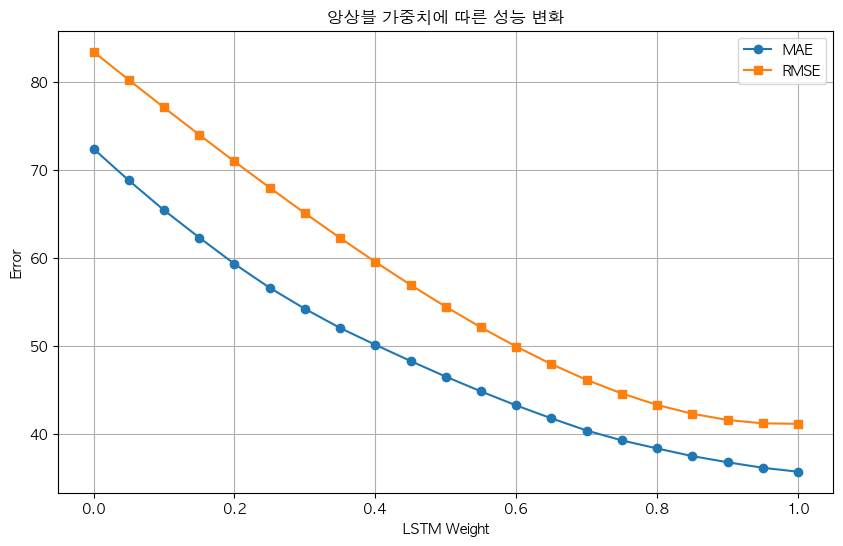

In [4]:

# Plot
plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] ='AppleGothic'
plt.rcParams['axes.unicode_minus'] =False
plt.plot(weights, mae_list, marker='o', label='MAE')
plt.plot(weights, rmse_list, marker='s', label='RMSE')
plt.xlabel("LSTM Weight")
plt.ylabel("Error")
plt.title("앙상블 가중치에 따른 성능 변화")
plt.legend()
plt.grid(True)
plt.show()


In [5]:

# Save final ensemble
df['RUL_pred'] = weights[best_idx] * df['RUL_pred_lstm'] + (1 - weights[best_idx]) * df['RUL_pred_xgb']
df[['unit', 'RUL_pred']].to_csv('../models/ensemble_pred.csv', index=False)
print("📦 앙상블 예측 결과 저장 완료: ensemble_pred.csv")


📦 앙상블 예측 결과 저장 완료: ensemble_pred.csv
